In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

 #  Part 1: Logistic Regression

In [ ]:
data = pd.read_csv('BankChurners.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


- ####  Exploring the distribution of the target variable Attrition_Flag (churn or not).

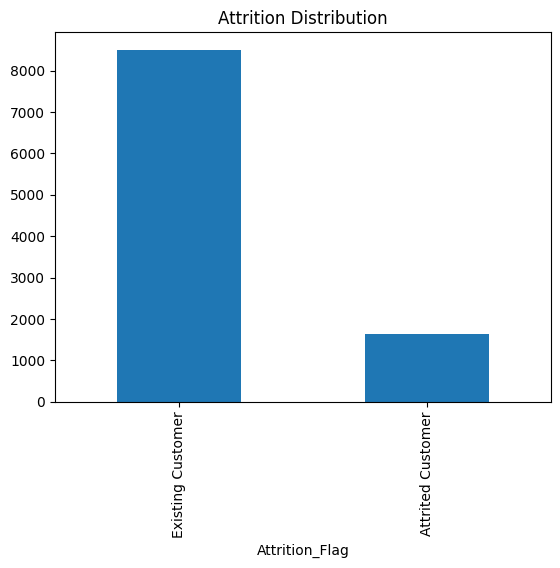

In [ ]:
attrition_distribution = data['Attrition_Flag'].value_counts()
attrition_distribution.plot(kind='bar', title='Attrition Distribution')
plt.show()

- #### Summarizing the numerical features and identifying any potential outliers or anomalies.

data.describe()

In [ ]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


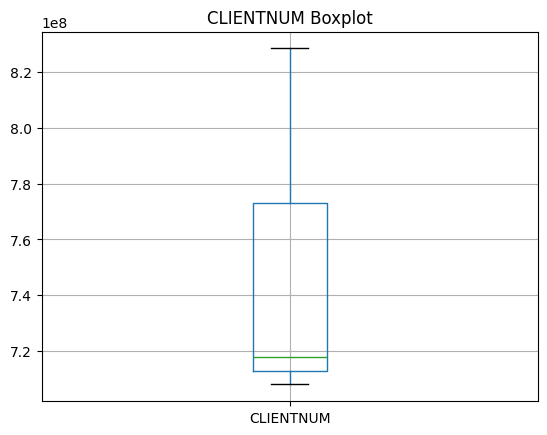

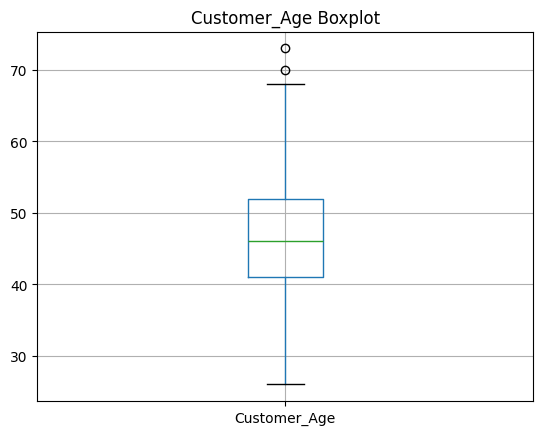

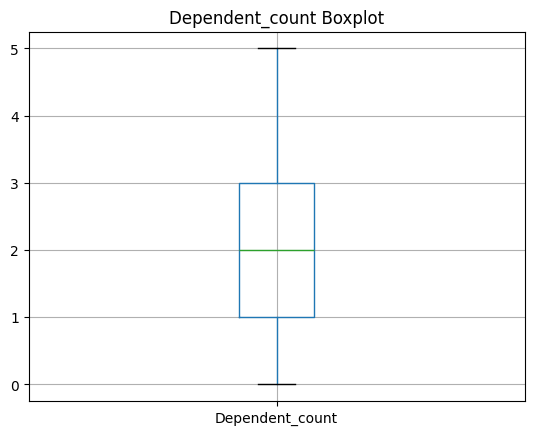

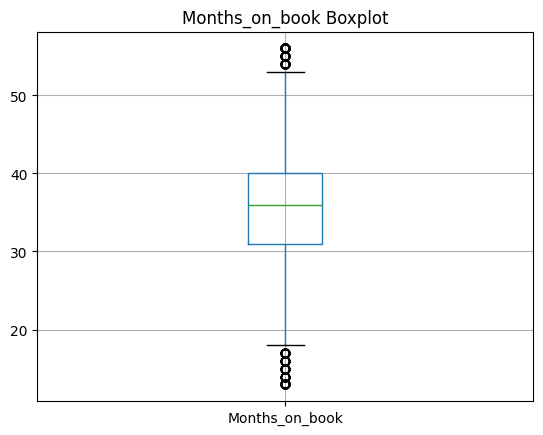

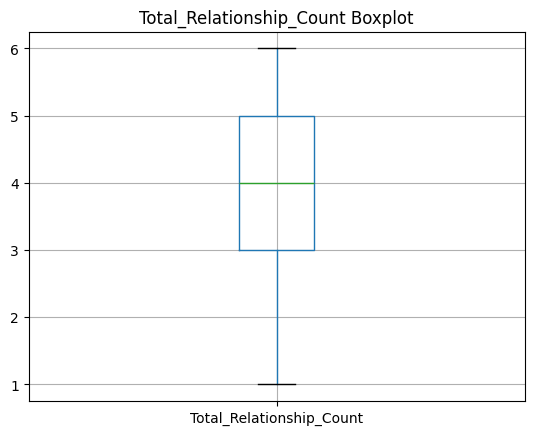

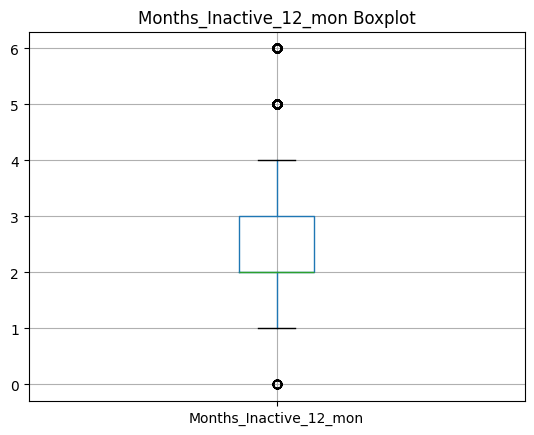

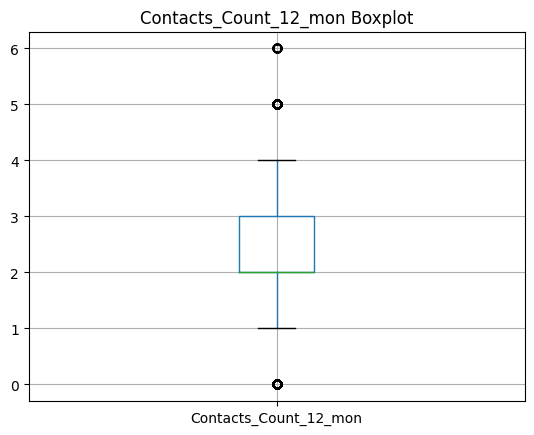

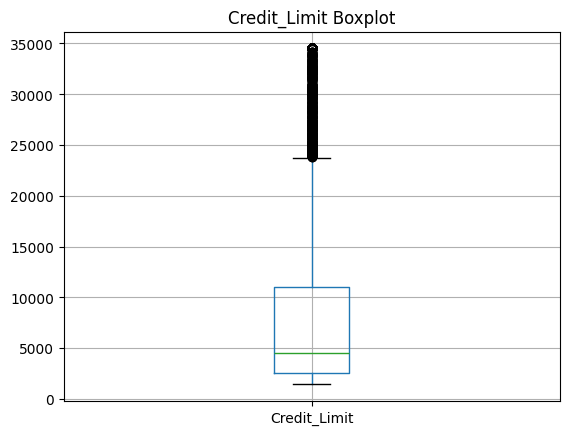

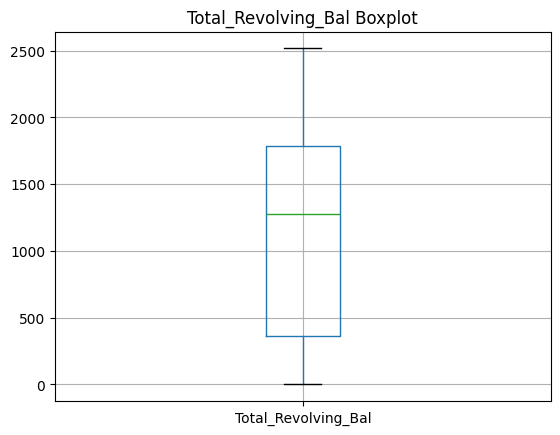

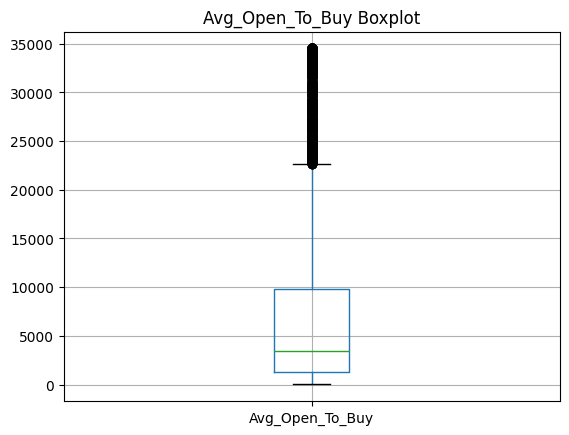

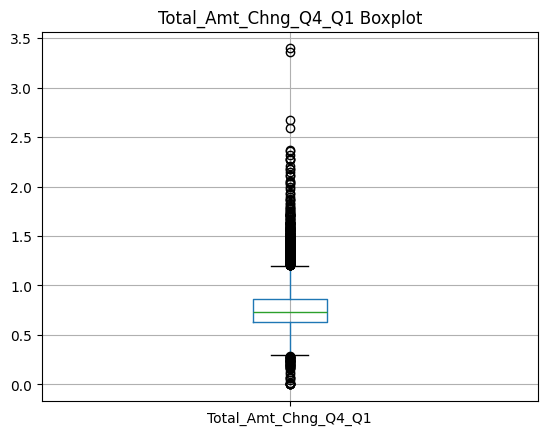

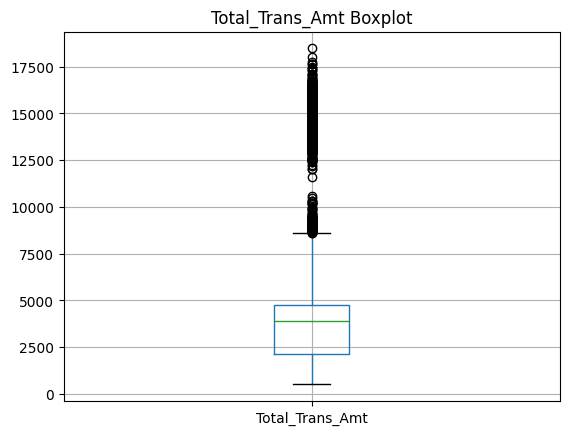

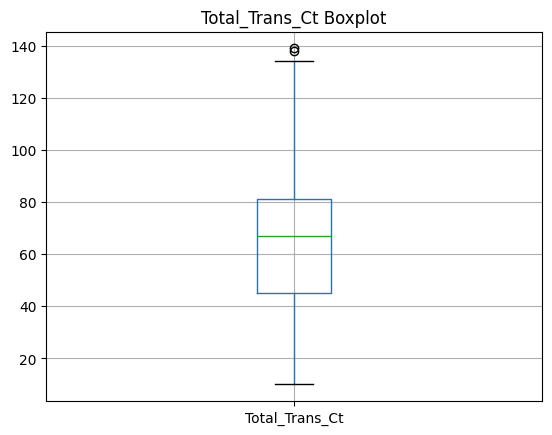

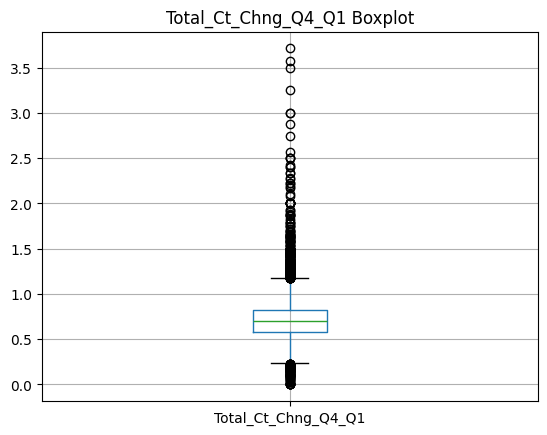

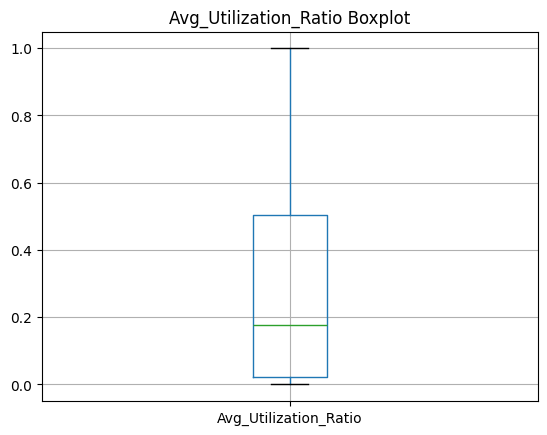

In [ ]:
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    data.boxplot([col])
    plt.title(f'{col} Boxplot')
    plt.show()

## 2. Data Preprocessing:
- #### Converting the Attrition_Flag column into a binary variable where 'Attrited Customer' is converted to 1 and 'Existing Customer' is converted to 0.

In [ ]:
data['Attrition_Flag'] = data['Attrition_Flag'].apply(lambda x: 0 if x == 'Existing Customer' else 1)

In [ ]:
data['Attrition_Flag'].unique()

array([0, 1])

- #### Handling any missing values in the dataset, if present.

In [ ]:
data.isna().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


- #### Normalizing or standardizing the numerical features to ensure that they are on the same scale.

In [ ]:
numerical_features = ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
                     'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                     'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
                     'Avg_Utilization_Ratio']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

- #### Splitting the data into training and testing sets with an 80-20 split.

In [ ]:
X = data.drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- #### Converting categorical variables into numerical values using one-hot encoding or label encoding.

In [ ]:
# Applying one-hot encoding to nominal categorical columns

categorical_columns = ['Gender', 'Marital_Status', 'Income_Category', 'Card_Category']
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Aligning train and test datasets to ensure they have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [ ]:
# Applying label encoding to ordinal categorical columns

label_encoder = LabelEncoder()
ordered_columns = ['Education_Level']
for col in ordered_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

In [ ]:
X_train.head()

,CLIENTNUM,Customer_Age,Dependent_count,Education_Level,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
9066,-0.707448,0.957290,-1.036462,6,0.008965,-1.809512,0.651940,0.492404,-0.540138,0.693525,...,True,False,False,False,False,False,True,False,False,False
5814,-0.675608,1.456266,1.273283,3,1.511590,-1.809512,1.641478,0.492404,-0.356056,0.785555,...,False,False,False,False,False,False,True,False,False,False
792,-0.568285,-0.165406,1.273283,6,0.008965,1.407306,-1.327136,0.492404,0.809285,0.595359,...,True,False,False,False,False,True,False,True,False,False
1791,-0.489964,-1.537589,-0.266547,2,0.008965,0.120579,0.651940,1.396424,-0.550921,1.661686,...,True,False,False,False,False,True,False,False,False,False
5011,-0.518913,0.333570,-0.266547,3,0.384621,0.763943,0.651940,1.396424,-0.650500,0.936485,...,False,False,True,False,False,False,False,False,False,False


## 3. Model Training:

In [ ]:
model = LogisticRegression(random_state=42)

- #### Training the model on the training data.

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_proba = model.predict_proba(X_test)[:, 1]
print(f"Confidence scores: {y_proba}")

Confidence scores: [0.11325471 0.01466574 0.08118838 ... 0.10570723 0.24149685 0.03783711]


## 4. Prediction:
- #### Using the trained Logistic Regression model to predict whether a new customer will churn based on provided feature values.

In [ ]:
new_customer = {
    'CLIENTNUM': 123456789,
    'Customer_Age': 45,
    'Dependent_count': 3,
    'Months_on_book': 36,
    'Total_Relationship_Count': 4,
    'Months_Inactive_12_mon': 1,
    'Contacts_Count_12_mon': 2,
    'Credit_Limit': 10000,
    'Total_Revolving_Bal': 500,
    'Avg_Open_To_Buy': 9500,
    'Total_Amt_Chng_Q4_Q1': 1.5,
    'Total_Trans_Amt': 1500,
    'Total_Trans_Ct': 40,
    'Total_Ct_Chng_Q4_Q1': 1.2,
    'Avg_Utilization_Ratio': 0.05,
    'Gender': 'M',
    'Marital_Status': 'Married',
    'Income_Category': '$60K - $80K',
    'Card_Category': 'Blue',
    'Education_Level': 'Graduate'
}

new_customer_df = pd.DataFrame([new_customer])
new_customer_df[numerical_features] = scaler.transform(new_customer_df[numerical_features])

# One-hot encoding nominal categorical columns
new_customer_df = pd.get_dummies(new_customer_df, columns=categorical_columns, drop_first=True)

# Aligning with training columns
new_customer_df = new_customer_df.reindex(columns=X_train.columns, fill_value=0)

# Label encoding ordinal categorical columns
for col in ordered_columns:
    new_customer_df[col] = label_encoder.transform(new_customer_df[col])

In [ ]:
# Predict churn probability
churn_probability = model.predict_proba(new_customer_df)[0][1]

# Predict churn class
churn_class = model.predict(new_customer_df)[0]

# Output the results
print(f"Churn Probability: {churn_probability:.2f}")
print(f"Predicted Class: {'Attrited Customer' if churn_class == 1 else 'Existing Customer'}")


Churn Probability: 0.00
Predicted Class: Existing Customer


- #### Evaluating the confidence level of the prediction and discuss any potential limitations.

The confidence level corresponds to the churn probability:

- A high probability (e.g., >0.7) indicates high confidence in the prediction.
- A probability near 0.5 suggests uncertainty.

Potential Limitations:
- **Feature Dependence**: The prediction depends on the features provided. Missing or inaccurate features can lead to incorrect predictions.<br>
- **Model Bias**: If the training data is imbalanced (e.g., more existing customers than attrited ones), the model might favor the majority class.<br>
- **Generalization**: The model may not generalize well to unseen data if it overfits the training data.<br>
- **Feature Engineering**: Differences in preprocessing (e.g., missing encoded categories) between training and new data can cause errors.

# Part 2: k-Nearest Neighbors (k-NN) Classification:

## 1. Data Preprocessing:

- #### Reusing the preprocessed data from Part 1.

## 2. Model Training:

- #### Implementing the k-NN classification algorithm using Scikit-learn.

- #### and experimenting with different values of k (the number of neighbors) and finding the optimal k by evaluating performance on the validation set.

In [ ]:
# Initializing k-NN classifier
k_values = range(1, 21)  # Testing values of k from 1 to 20
validation_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Evaluating on the test set
    y_pred = knn.predict(X_test)
    validation_scores.append(accuracy_score(y_test, y_pred))

# Finding the optimal k
optimal_k = k_values[validation_scores.index(max(validation_scores))]
print(f"Optimal k: {optimal_k}")

Optimal k: 5


## 3. Comparison with Logistic Regression

#### **Performance Metrics**
1. **Accuracy**:
   - Logistic Regression may provide higher accuracy if the relationship between features and target is linear.
   - k-NN can outperform Logistic Regression in cases with complex, non-linear relationships, provided the optimal value of \( k \) is chosen.

2. **Precision, Recall, and F1-Score**:
   - Logistic Regression often performs better in imbalanced datasets because it provides probabilistic outputs that can be thresholded.
   - k-NN can be sensitive to class imbalances, as it directly depends on the distribution of neighbors.

3. **Computation Time**:
   - Logistic Regression is computationally faster for both training and predictions, especially with large datasets.
   - k-NN can be computationally expensive during prediction due to the need to calculate distances for all training data.

---

#### **Strengths**
1. **Logistic Regression**:
   - Easy to interpret due to its linear nature.
   - Well-suited for datasets where the relationship between input features and the output is linear.
   - Robust to irrelevant features when regularization is applied.

2. **k-NN**:
   - Handles non-linear relationships well.
   - No explicit training phase; the algorithm is simple to implement.
   - Flexibility in adapting to different data structures.

---

#### **Weaknesses**
1. **Logistic Regression**:
   - Assumes linearity, which may not capture complex patterns in data.
   - May struggle with multicollinearity or non-linearly separable classes without feature engineering.

2. **k-NN**:
   - Sensitive to the choice of \( k \) and the distance metric.
   - Computationally intensive with large datasets.
   - Susceptible to noisy data and irrelevant features, leading to poor performance.


## 4. Prediction:

- #### Using the trained k-NN model to predict whether a new customer will churn based on provided feature values.

In [ ]:
churn_class_knn = knn.predict(new_customer_df)[0]
print(f"Predicted Class (k-NN): {'Attrited Customer' if churn_class_knn == 1 else 'Existing Customer'}")

Predicted Class (k-NN): Existing Customer


- #### Evaluating the confidence level of the prediction.

In [ ]:
# Calculate confidence level
neighbors = knn.kneighbors(new_customer_df, return_distance=False)
neighbor_labels = y_train.iloc[neighbors[0]]
confidence_knn = sum(neighbor_labels == churn_class_knn) / optimal_k

print(f"Confidence Level (k-NN): {confidence_knn:.2f}")

Confidence Level (k-NN): 3.00


## 5. Visualization:

- #### Creating visualizations to represent the impact of different k values on model performance.

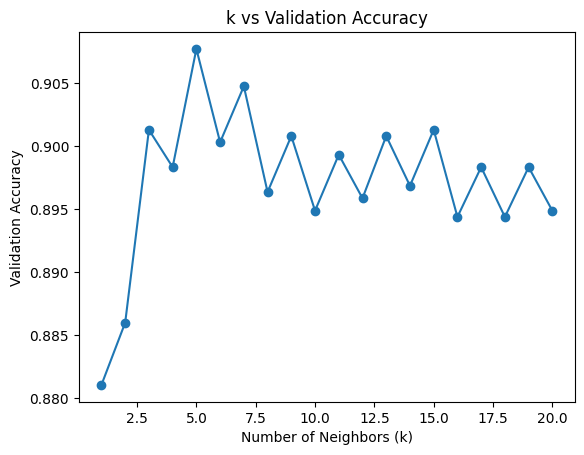

In [ ]:
plt.plot(k_values, validation_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Validation Accuracy')
plt.title('k vs Validation Accuracy')
plt.show()

- #### Plotting the decision boundary for the k-NN classifier if the dataset is reduced to two dimensions.

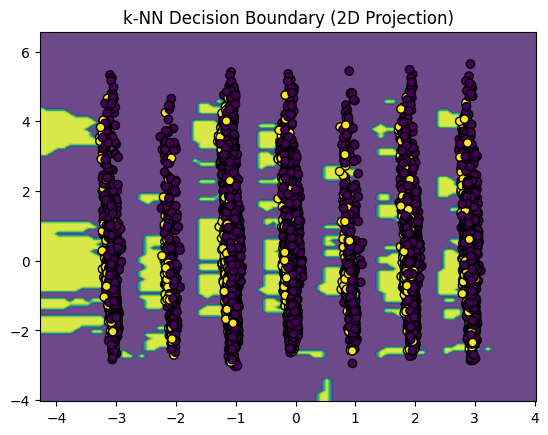

In [ ]:
# Reducing data to 2 dimensions
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Training k-NN on 2D data
knn_2d = KNeighborsClassifier(n_neighbors=optimal_k)
knn_2d.fit(X_train_2d, y_train)

# Plotting decision boundary
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolor='k')
plt.title('k-NN Decision Boundary (2D Projection)')
plt.show()